Conociendo la problemática sobre denuncias de abusos mediante el reporte obtenido de la pagina del gobierno de Argentina.  

Se analiza una manera de realizar campañas informativas y educativas para disminuir los índices de denuncias, para esto necesitaríamos  agrupar los casos y realizar campañas educativas e informativas.

Según el tipo de etiqueta del caso Ahora bien, analizando la problemática se decide aplicar un algoritmo de clustering y de esta manera proceder a etiquetar cada caso, realizando previamente un análisis exploratorio a los datos estudiados.    

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
df = pd.read_csv("oficinaRESCATE.csv")

In [ ]:
df

,fecha_ingreso,hora_ingreso,nro_registro_interno,situacion,origen,es_anonima,tema,subtema,provincia,localidad,dependencia_alta,via_ingreso,consultante_nacionalidad,consultante_provincia,consultante_localidad,consultante_tipo,consultante_como_conocio_la_linea,consultante_genero,consultante_edad_aparente,provincia_indec_id
0,2020-01-01,NaN,1584554505,Urgencia,Ciudadano,No,Trata,Persona desaparecida,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,PNR - Línea 145,Línea 145,Argentina,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Consultante - ciudadano,NaN,Mujer,25.0,2
1,2020-01-02,NaN,4584554505,Urgencia,Ciudadano,No,Relaciones de familia,Deberes de responsabilidad parental o familiar,Jujuy,NaN,PNR - Línea 145,Línea 145,Bolivia,NaN,NaN,Consultante - ciudadano,NaN,Mujer,NaN,38
2,2020-01-02,NaN,5584554505,Urgencia,Ciudadano,Si,Trata,Explotación sexual,Buenos Aires,Buenos Aires,PNR - Línea 145,Línea 145,NaN,NaN,NaN,Consultante - ciudadano,NaN,Mujer,NaN,6
3,2020-01-02,NaN,6584554505,Urgencia,Ciudadano,Si,Violencia de género,Económica,Salta,Salta,PNR - Línea 145,Línea 145,Argentina,NaN,NaN,Consultante,"No sabe, no recuerda",Mujer,NaN,66
4,2020-01-02,NaN,7584554505,Urgencia,Ciudadano,Si,Trata,Explotación sexual,NaN,NaN,PNR - Línea 145,Línea 145,NaN,NaN,NaN,Consultante,"No sabe, no recuerda",Mujer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4276,2022-12-30,17:30,2575757525,Urgencia,Ciudadano,No,Trata,Salud mental,NaN,NaN,PNR - Línea 145,Línea 145,NaN,NaN,NaN,Consultante,NaN,Mujer cis,0.0,NaN
4277,2022-12-30,20:33,6584848435,Urgencia,Ciudadano,No,Salud,Salud mental,Río Negro,Rio Negro,PNR - Línea 145,Línea 145,NaN,Río Negro,NaN,Consultante,NaN,Mujer,65.0,62
4278,2022-12-31,07:11,8405848435,Urgencia,Ciudadano,Sí,Trata,Explotación sexual,Misiones,Garupá,PNR - Línea 145,Línea 145,NaN,Misiones,NaN,Consultante,"No sabe, no recuerda",Varón trans,30.0,54
4279,2022-12-31,11:06,9405848435,Urgencia,Ciudadano,No,Trata,Explotación sexual,Buenos Aires,José C. Paz,PNR - Línea 145,Línea 145,Argentina,Buenos Aires,Monte Grande,Consultante,NaN,Varón cis,51.0,06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   fecha_ingreso                      4281 non-null   object 
 1   hora_ingreso                       1361 non-null   object 
 2   nro_registro_interno               4281 non-null   int64  
 3   situacion                          4273 non-null   object 
 4   origen                             4281 non-null   object 
 5   es_anonima                         4281 non-null   object 
 6   tema                               4276 non-null   object 
 7   subtema                            4276 non-null   object 
 8   provincia                          2685 non-null   object 
 9   localidad                          2503 non-null   object 
 10  dependencia_alta                   4281 non-null   object 
 11  via_ingreso                        3642 non-null   objec

In [ ]:
df.isnull().sum()

fecha_ingreso                           0
hora_ingreso                         2920
nro_registro_interno                    0
situacion                               8
origen                                  0
es_anonima                              0
tema                                    5
subtema                                 5
provincia                            1596
localidad                            1778
dependencia_alta                        0
via_ingreso                           639
consultante_nacionalidad             3490
consultante_provincia                2770
consultante_localidad                3666
consultante_tipo                      426
consultante_como_conocio_la_linea    3516
consultante_genero                   1080
consultante_edad_aparente            1288
provincia_indec_id                   1580
dtype: int64

In [ ]:
df["situacion"]= df["situacion"].fillna("Urgencia")#Cambiamos los valores nulos por "Urgencia" en la columna situacion.


Text(0.5, 1.0, 'Tema')

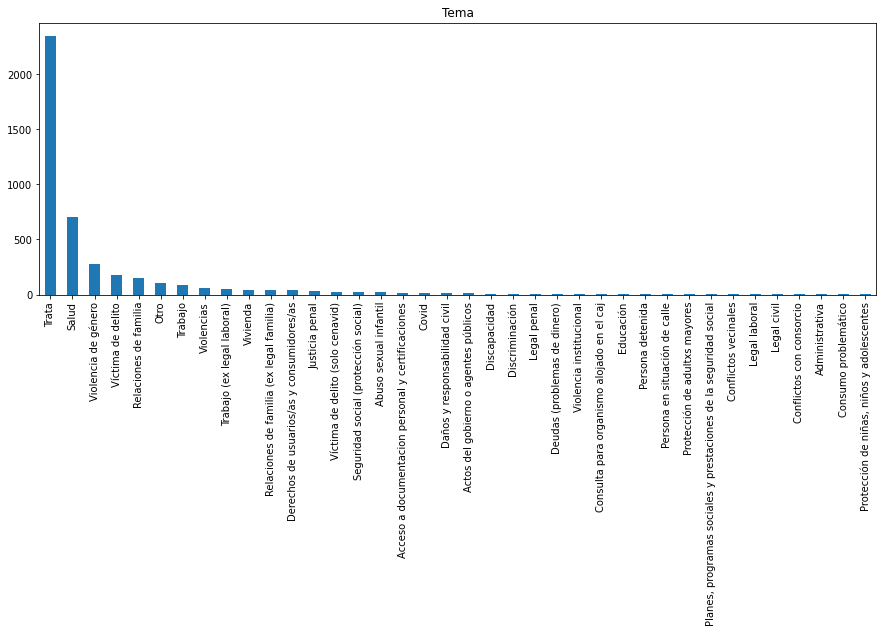

In [ ]:
grafica1 = df["tema"].value_counts().plot(kind="bar", figsize= (15,5))
plt.title("Tema")

In [ ]:
df["tema"]= df["tema"].fillna("Trata")#Cambiamos los valores nulos por "Trata"
df["subtema"]= df["subtema"].fillna("Salud mental")#Cambiamos los valores nulos por "Salud mental"


In [ ]:
df["origen"]= df["origen"].str.replace(u"nan","Ciudadano") #Cambiamos los valores nulos por "Ciudadano"


In [ ]:
df.isnull().sum()

fecha_ingreso                           0
hora_ingreso                         2920
nro_registro_interno                    0
situacion                               0
origen                                  0
es_anonima                              0
tema                                    0
subtema                                 0
provincia                            1596
localidad                            1778
dependencia_alta                        0
via_ingreso                           639
consultante_nacionalidad             3490
consultante_provincia                2770
consultante_localidad                3666
consultante_tipo                      426
consultante_como_conocio_la_linea    3516
consultante_genero                   1080
consultante_edad_aparente            1288
provincia_indec_id                   1580
dtype: int64

Text(0.5, 1.0, 'Provincia')

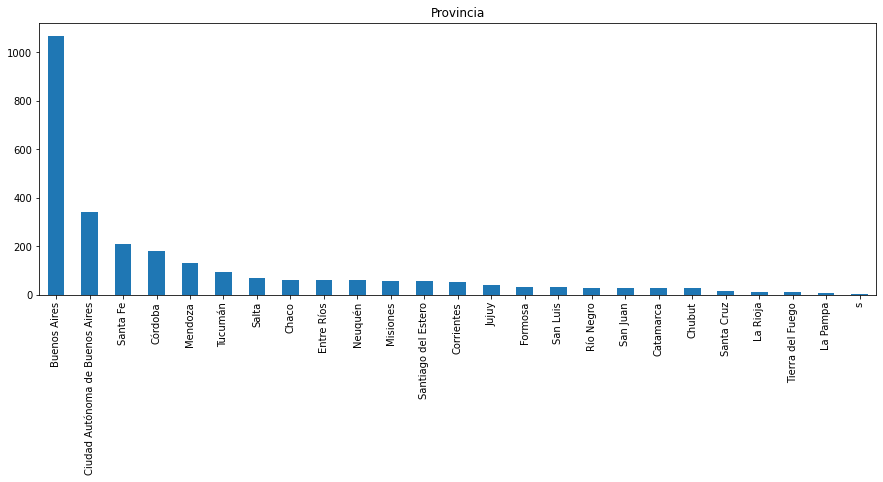

In [ ]:
grafica1 = df["provincia"].value_counts().plot(kind="bar", figsize= (15,5))
plt.title("Provincia")

In [ ]:
df["provincia"]= df["provincia"].fillna("Buenos Aires")#Cambiamos los valores nulos por "Buenos Aires"
df["localidad"]= df["localidad"].fillna("Buenos Aires")#Cambiamos los valores nulos por "Buenos Aires"


Text(0.5, 1.0, 'via_ingreso')

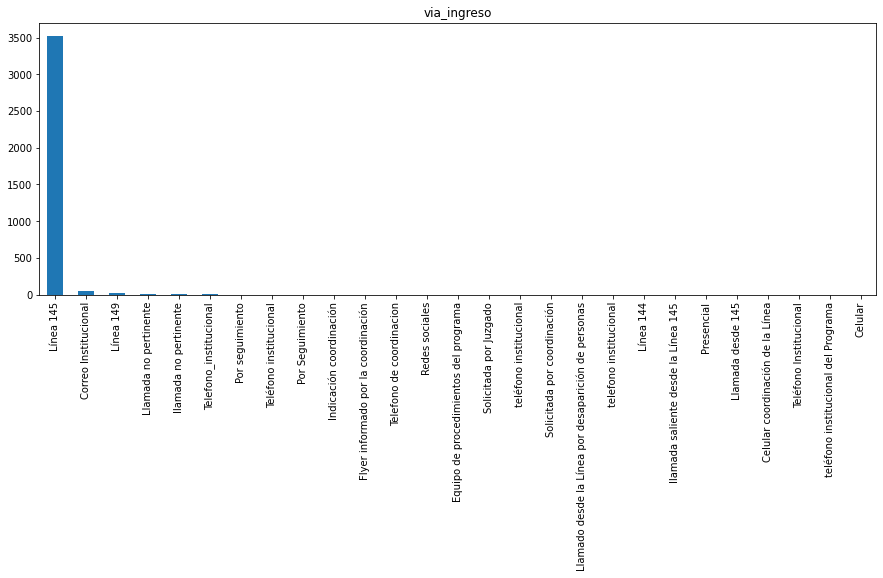

In [ ]:
grafica1 = df["via_ingreso"].value_counts().plot(kind="bar", figsize= (15,5))
plt.title("via_ingreso")

In [ ]:
df["via_ingreso"]= df["via_ingreso"].fillna("Línea 145")


In [ ]:
df.isnull().sum()

fecha_ingreso                           0
hora_ingreso                         2920
nro_registro_interno                    0
situacion                               0
origen                                  0
es_anonima                              0
tema                                    0
subtema                                 0
provincia                               0
localidad                               0
dependencia_alta                        0
via_ingreso                             0
consultante_nacionalidad             3490
consultante_provincia                2770
consultante_localidad                3666
consultante_tipo                      426
consultante_como_conocio_la_linea    3516
consultante_genero                   1080
consultante_edad_aparente            1288
provincia_indec_id                   1580
dtype: int64

Text(0.5, 1.0, 'consultante_tipo')

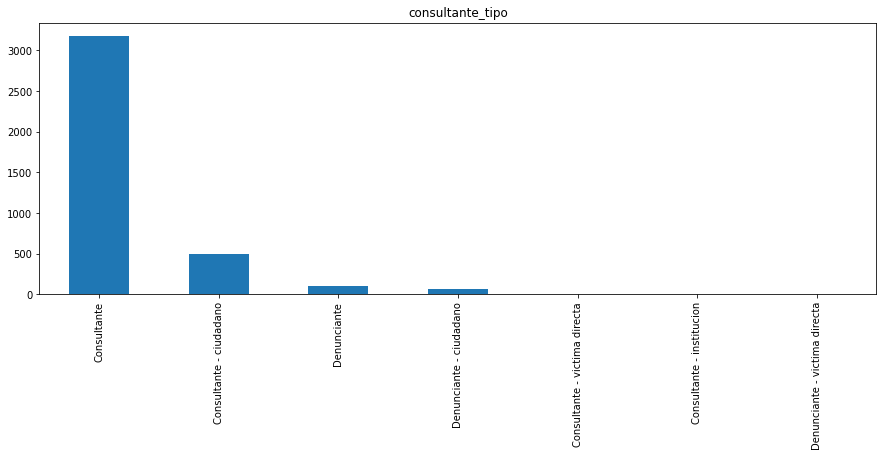

In [ ]:
grafica1 = df["consultante_tipo"].value_counts().plot(kind="bar", figsize= (15,5))
plt.title("consultante_tipo")

In [ ]:
df["consultante_tipo"]= df["consultante_tipo"].fillna("Consultante")


Text(0.5, 1.0, 'consultante_genero')

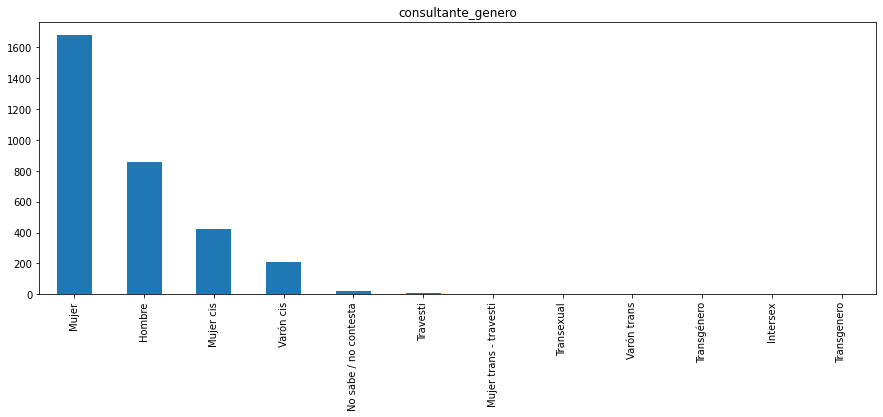

In [ ]:
grafica1 = df["consultante_genero"].value_counts().plot(kind="bar", figsize= (15,5))
plt.title("consultante_genero")

In [ ]:
df["consultante_genero"]= df["consultante_genero"].fillna(method = "bfill")


Text(0.5, 1.0, 'consultante_genero')

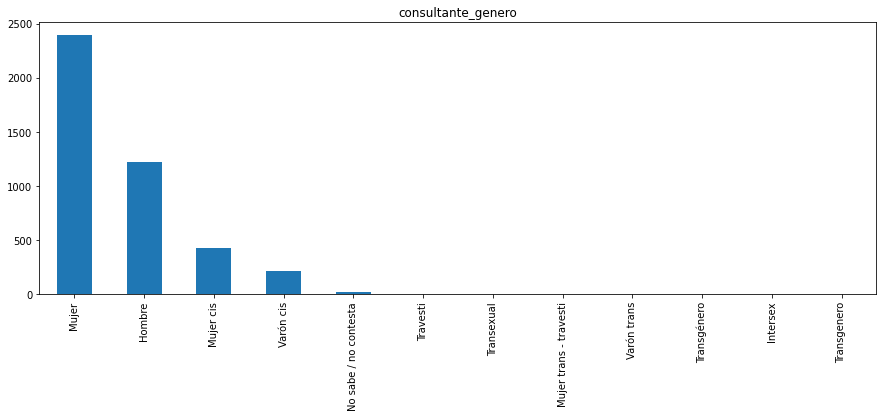

In [ ]:
grafica1 = df["consultante_genero"].value_counts().plot(kind="bar", figsize= (15,5))
plt.title("consultante_genero")

Text(0.5, 1.0, 'consultante_edad_aparente')

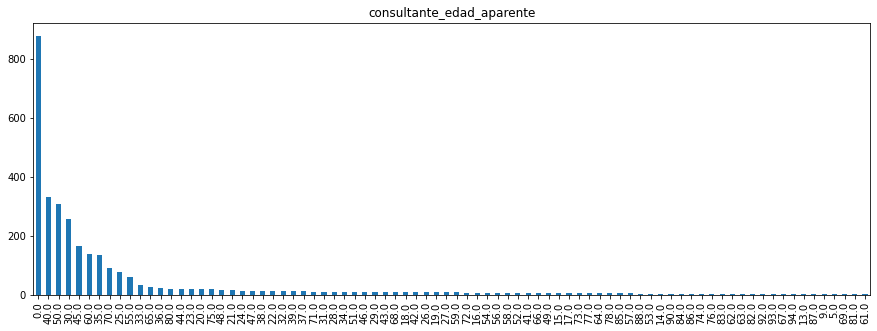

In [ ]:
grafica1 = df["consultante_edad_aparente"].value_counts().plot(kind="bar", figsize= (15,5))
plt.title("consultante_edad_aparente")

In [ ]:
print(df["consultante_edad_aparente"].mean())

31.196124290010022


In [ ]:
df["consultanta_edad_aparente"]= df["consultante_edad_aparente"].fillna("31")


Text(0.5, 1.0, 'consultante_edad_aparente')

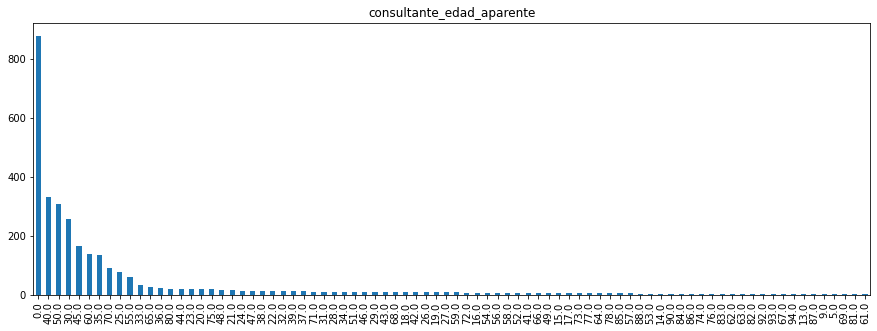

In [ ]:
grafica1 = df["consultante_edad_aparente"].value_counts().plot(kind="bar", figsize= (15,5))
plt.title("consultante_edad_aparente")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


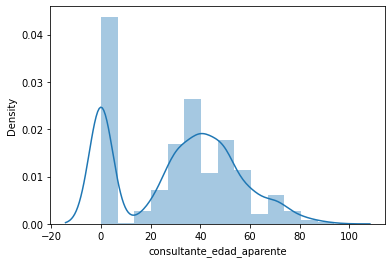

In [ ]:
sns.distplot(df['consultante_edad_aparente'])

In [ ]:
df = df.drop(columns = ["fecha_ingreso","nro_registro_interno","hora_ingreso","consultante_nacionalidad","consultante_provincia","consultante_localidad","consultante_como_conocio_la_linea", "consultante_edad_aparente", "provincia_indec_id"])

In [ ]:
df.isnull().sum()

situacion                    0
origen                       0
es_anonima                   0
tema                         0
subtema                      0
provincia                    0
localidad                    0
dependencia_alta             0
via_ingreso                  0
consultante_tipo             0
consultante_genero           0
consultanta_edad_aparente    0
dtype: int64

In [ ]:
df

,situacion,origen,es_anonima,tema,subtema,provincia,localidad,dependencia_alta,via_ingreso,consultante_tipo,consultante_genero,consultanta_edad_aparente
0,Urgencia,Ciudadano,No,Trata,Persona desaparecida,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,PNR - Línea 145,Línea 145,Consultante - ciudadano,Mujer,25.0
1,Urgencia,Ciudadano,No,Relaciones de familia,Deberes de responsabilidad parental o familiar,Jujuy,Buenos Aires,PNR - Línea 145,Línea 145,Consultante - ciudadano,Mujer,31
2,Urgencia,Ciudadano,Si,Trata,Explotación sexual,Buenos Aires,Buenos Aires,PNR - Línea 145,Línea 145,Consultante - ciudadano,Mujer,31
3,Urgencia,Ciudadano,Si,Violencia de género,Económica,Salta,Salta,PNR - Línea 145,Línea 145,Consultante,Mujer,31
4,Urgencia,Ciudadano,Si,Trata,Explotación sexual,Buenos Aires,Buenos Aires,PNR - Línea 145,Línea 145,Consultante,Mujer,31
...,...,...,...,...,...,...,...,...,...,...,...,...
4276,Urgencia,Ciudadano,No,Trata,Salud mental,Buenos Aires,Buenos Aires,PNR - Línea 145,Línea 145,Consultante,Mujer cis,0.0
4277,Urgencia,Ciudadano,No,Salud,Salud mental,Río Negro,Rio Negro,PNR - Línea 145,Línea 145,Consultante,Mujer,65.0
4278,Urgencia,Ciudadano,Sí,Trata,Explotación sexual,Misiones,Garupá,PNR - Línea 145,Línea 145,Consultante,Varón trans,30.0
4279,Urgencia,Ciudadano,No,Trata,Explotación sexual,Buenos Aires,José C. Paz,PNR - Línea 145,Línea 145,Consultante,Varón cis,51.0


Text(0.5, 1.0, 'es_anonima')

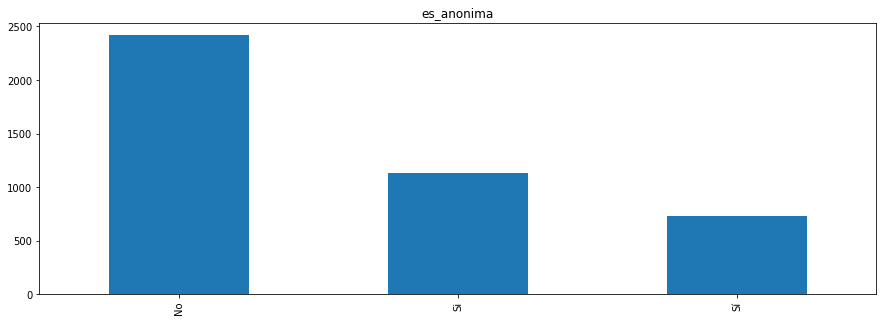

In [ ]:
grafica1 = df["es_anonima"].value_counts().plot(kind="bar", figsize= (15,5))
plt.title("es_anonima")

In [ ]:
df["es_anonima"] = df["es_anonima"].replace({"Si":1, "Sí":1, "No":0})

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


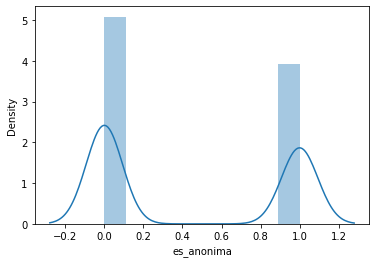

In [ ]:
sns.distplot(df['es_anonima'])

In [ ]:
df["consultante_genero"] = df["consultante_genero"].replace({"Mujer":1, "Hombre":0, "Mujer cis":1.5,"Varón cis":0.5, "Mujer trans - travesti":1.2,"No sabe / no contesta":3, "Transexual":2, "Transgénero":2.2, "Varón trans": 0.2, "Intersex": 4, "Travesti":0.2, "Transgenero":2.2 })

Text(0.5, 1.0, 'consultante_genero')

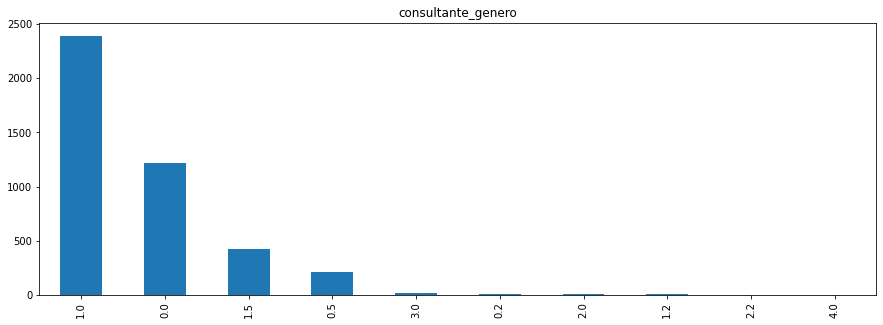

In [ ]:
grafica1 = df["consultante_genero"].value_counts().plot(kind="bar", figsize= (15,5))
plt.title("consultante_genero")

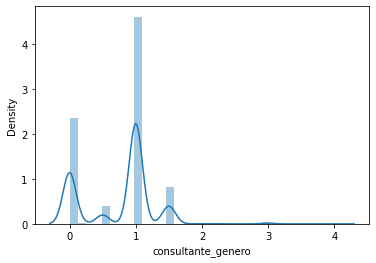

In [ ]:
sns.distplot(df['consultante_genero'])

In [ ]:
df

,situacion,origen,es_anonima,tema,subtema,provincia,localidad,dependencia_alta,via_ingreso,consultante_tipo,consultante_genero,consultanta_edad_aparente
0,Urgencia,Ciudadano,0,Trata,Persona desaparecida,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,PNR - Línea 145,Línea 145,Consultante - ciudadano,1.0,25.0
1,Urgencia,Ciudadano,0,Relaciones de familia,Deberes de responsabilidad parental o familiar,Jujuy,Buenos Aires,PNR - Línea 145,Línea 145,Consultante - ciudadano,1.0,31
2,Urgencia,Ciudadano,1,Trata,Explotación sexual,Buenos Aires,Buenos Aires,PNR - Línea 145,Línea 145,Consultante - ciudadano,1.0,31
3,Urgencia,Ciudadano,1,Violencia de género,Económica,Salta,Salta,PNR - Línea 145,Línea 145,Consultante,1.0,31
4,Urgencia,Ciudadano,1,Trata,Explotación sexual,Buenos Aires,Buenos Aires,PNR - Línea 145,Línea 145,Consultante,1.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...
4276,Urgencia,Ciudadano,0,Trata,Salud mental,Buenos Aires,Buenos Aires,PNR - Línea 145,Línea 145,Consultante,1.5,0.0
4277,Urgencia,Ciudadano,0,Salud,Salud mental,Río Negro,Rio Negro,PNR - Línea 145,Línea 145,Consultante,1.0,65.0
4278,Urgencia,Ciudadano,1,Trata,Explotación sexual,Misiones,Garupá,PNR - Línea 145,Línea 145,Consultante,0.2,30.0
4279,Urgencia,Ciudadano,0,Trata,Explotación sexual,Buenos Aires,José C. Paz,PNR - Línea 145,Línea 145,Consultante,0.5,51.0


In [ ]:
df = pd.get_dummies(df[["situacion","origen","tema", "subtema","provincia","localidad","dependencia_alta","via_ingreso","consultante_tipo" ]])

In [ ]:
df

,situacion_Emergencia,situacion_Urgencia,origen_Ciudadano,origen_Institución,origen_Institución - 145,origen_Institución - Acción Católica,origen_Institución - Afip,origen_Institución - Asesoría General Tutelar de CABA,origen_Institución - CONICET,origen_Institución - CPEM N° 18 NEUQUEN,...,via_ingreso_telefono institucional,via_ingreso_teléfono institucional,via_ingreso_teléfono institucional del Programa,consultante_tipo_Consultante,consultante_tipo_Consultante - ciudadano,consultante_tipo_Consultante - institucion,consultante_tipo_Consultante - victima directa,consultante_tipo_Denunciante,consultante_tipo_Denunciante - ciudadano,consultante_tipo_Denunciante - victima directa
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4276,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4277,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4278,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4279,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Text(0.5, 1.0, 'METODO DE CODO')

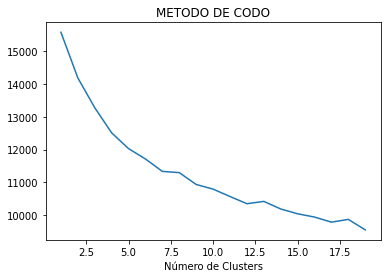

In [ ]:
wcss = []

for i in range(1, 20):
  kmeans = KMeans(n_clusters= i, max_iter = 300)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,20), wcss)
plt.xlabel("Número de Clusters")
plt.title("METODO DE CODO")

In [ ]:
kmeans = KMeans(n_clusters=7).fit(df)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [ ]:
centroids

array([[ 1.70132325e-02,  9.82986767e-01,  9.56521739e-01, ...,
         1.62570888e-01,  7.93950851e-02, -1.19262239e-18],
       [ 6.98689956e-03,  9.93013100e-01,  9.26637555e-01, ...,
         1.39737991e-02,  1.39737991e-02, -2.43945489e-18],
       [ 5.53505535e-03,  9.94464945e-01,  9.92619926e-01, ...,
        -6.24500451e-17,  6.93889390e-17,  3.52365706e-19],
       ...,
       [-2.77555756e-17,  1.00000000e+00,  9.53488372e-01, ...,
        -6.24500451e-17,  6.24500451e-17,  1.89735380e-19],
       [ 1.04821803e-02,  9.89517820e-01,  9.26624738e-01, ...,
         2.09643606e-03,  2.30607966e-02,  2.09643606e-03],
       [ 1.63636364e-02,  9.83636364e-01,  9.80000000e-01, ...,
        -6.24500451e-17,  6.93889390e-17, -5.42101086e-20]])

In [ ]:
df["lb"]=labels

Text(0.5, 1.0, 'consultante_genero')

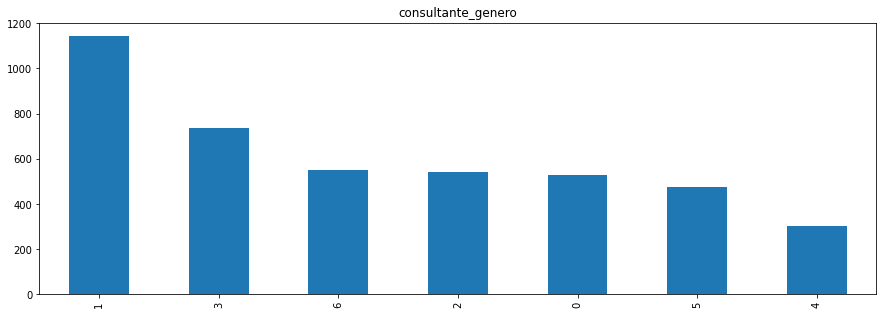

In [ ]:
grafica1 = df["lb"].value_counts().plot(kind="bar", figsize= (15,5))
plt.title("consultante_genero")